In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import splrep, splev

In [65]:
data = pd.read_csv('resources/market-price_hit.csv')
data

,date,price
0,2020-09-27 00:00:00,10732.40
1,2020-09-28 00:00:00,10774.24
2,2020-09-29 00:00:00,10692.33
3,2020-09-30 00:00:00,10840.80
4,2020-10-01 00:00:00,10777.92
...,...,...
361,2021-09-23 00:00:00,43604.76
362,2021-09-24 00:00:00,44888.96
363,2021-09-25 00:00:00,42815.56
364,2021-09-26 00:00:00,42742.01


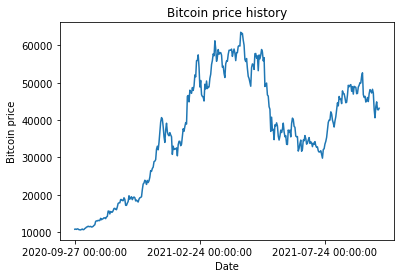

In [66]:
x = data['date']
y = data['price']
plt.xlabel('Date')
plt.ylabel('Bitcoin price')
plt.title('Bitcoin price history')
plt.plot(x, y)
plt.xticks(x[::150]);

In [67]:
def build_models(values):
    time = np.arange(0, len(values))
    a_times = time[:, np.newaxis] ** [0, 1, 2, 3]
    table = []
    for i in range(len(values)):
        table.append([1, np.sin(i), np.cos(i) * i, i])
    t = [i * 5 for i in range(1, 50)]

    # Coefficients
    a1 = np.linalg.lstsq(table, values, rcond=None)[0]
    a2 = np.linalg.lstsq(a_times, values, rcond=None)[0]

    # Splain Model
    spl = splrep(time, values, task=-1, t=t, k=3)
    mnk_spl = splev(time, spl)

    # Polynom Model
    polynomial = []
    for i in range(len(values)):
        polynomial.append(a1[0] + a1[1] * np.sin(i) + a1[2] * i * np.cos(i) + a1[3] * i)

    # Trigonometric Model
    trigonometry = []
    for i in range(len(values)):
        trigonometry.append(a2[0] + a2[1] * i + a2[2] * i ** 2 + a2[3] * i ** 3)

    return mnk_spl, polynomial, trigonometry

In [68]:
def calc_adeq(data, model, title):
    e = data - model
    n = len(e)
    a_numeration = 0
    a_denumerator = 0
    e_numeration = 0
    e_denumerator = 0

    for i in range(0, n):
        a_numeration += e[i] ** 3
        a_denumerator += e[i] ** 2
        e_numeration += e[i] ** 4
        e_denumerator += e[i] ** 2

    a_table = (a_numeration * 1 / n) / np.sqrt(((1 / n * a_denumerator) ** 3))
    e_calculated = ((e_numeration * 1 / n) / ((1 / n * e_denumerator) ** 2)) - 3 + (6 / (n + 1))

    value_of_a = (6 * (n - 2)) / ((n + 1) * (n + 3))
    value_of_a_inner = (6 * (n - 2)) / ((n + 1) * (n + 3))

    value_of_e = (24 * n * (n - 2) * (n - 3)) / (((n + 1) ** 2) * (n + 3) * (n + 5))
    value_of_e_inner = (24 * n * (n - 2) * (n - 3)) / (((n + 1) ** 2) * (n + 3) * (n + 5))

    ineq_a = 1.5 * np.sqrt(value_of_a), 2 * np.sqrt(value_of_a_inner)
    ineq_e = 1.5 * np.sqrt(value_of_e), 2 * np.sqrt(value_of_e_inner)
    print(f'A {np.abs(a_table)} < {ineq_a[0]} | {np.abs(a_table)} > {ineq_a[1]}')
    print(f'E {np.abs(e_calculated)} < {ineq_e[0]} | {np.abs(e_calculated)} > {ineq_e[1]}')
    plt.title(title)
    sns.kdeplot(e, shade=True)
    plt.show()

In [69]:
def calculate_coef(data, model):
    e = data - model
    d_numerator = 0
    d_denominator = 0
    for i in range(0, len(e)):
        if i != 0:
            d_numerator += (e[i] - e[i - 1]) ** 2
        d_denominator += e[i] ** 2
    return d_numerator/d_denominator

In [70]:
def get_r(data, model):
    e = 0
    e_f = 0
    for i in range(0, len(data)):
        e += (model[i] - data[i] ** 2)
        e_f += (model[i] - (sum(data) / len(data)) ** 2)
    r = 1 - (e / e_f)
    print(f'R^2 = {np.abs(r)}')

In [71]:
def calc_accuracy(data, model):
    sum_abs_error = 0
    for i in range(0, len(data)):
        sum_abs_error += ((np.abs(model[i] - data[i])) / data[i])
    return (sum_abs_error / len(data)) * 100

In [72]:
mnk, polynom, trig = build_models(y)

MNK Spline
A 0.2242035998477831 < 0.1904896399217687 | 0.2242035998477831 > 0.2539861865623583
E 2.2909625317559508 < 0.37633553227636696 | 2.2909625317559508 > 0.5017807097018226


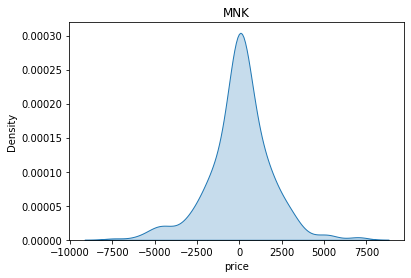

In [73]:
N = 150
print('MNK Spline')
calc_adeq(y, mnk, 'MNK')

Polynom
A 0.6945864656213748 < 0.1904896399217687 | 0.6945864656213748 > 0.2539861865623583
E 0.9122621979015295 < 0.37633553227636696 | 0.9122621979015295 > 0.5017807097018226


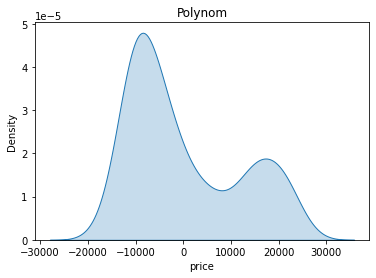

In [74]:
print('Polynom')
calc_adeq(y, polynom, 'Polynom')

Trigonometry
A 0.11625571189374223 < 0.1904896399217687 | 0.11625571189374223 > 0.2539861865623583
E 1.2083110906645251 < 0.37633553227636696 | 1.2083110906645251 > 0.5017807097018226


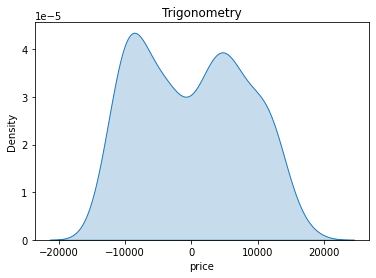

In [75]:
print('Trigonometry')
calc_adeq(y, trig, 'Trigonometry')

In [76]:
d_mnk = calculate_coef(y[0:N], mnk[0:N])
d_polynom = calculate_coef(y[0:N], polynom[0:N])
d_trig = calculate_coef(y[0:N], trig[0:N])

In [77]:
print(f'MNK Spline critical = {d_mnk} | (4-d) = {4-d_mnk}')
print(f'Polynom critical = {d_polynom} | (4-d) = {4-d_polynom}')
print(f'Trigonometry critical = {d_polynom} | (4-d) = {4-d_trig}')

MNK Spline critical = 1.411011606811227 | (4-d) = 2.5889883931887727
Polynom critical = 0.019847121193483225 | (4-d) = 3.980152878806517
Trigonometry critical = 0.019847121193483225 | (4-d) = 3.9622803114707525


In [78]:
def get_d_coef(n):
    # For alpha = 0.01
    if n == 50:
        return 1.324, 1.403
    if n == 150:
        return 1.611, 1.637
    if n == 100:
        return 1.522, 1.562
    if n == 200:
        return 1.664, 1.684
    else:
        return 0, 0

In [79]:
d_1, d_2 = get_d_coef(N)
print(f'd_1 = {d_1} | d_2 = {d_2}\n')

d_1 = 1.611 | d_2 = 1.637



In [80]:
e_mnk = np.round(calc_accuracy(y, mnk), 5)
e_polynom = np.round(calc_accuracy(y, polynom), 5)
e_trig = np.round(calc_accuracy(y, trig), 5)

In [81]:
print(f'MNK Spline Error = {e_mnk}%')
print(f'Polynom Error = {e_polynom}%')
print(f'Trigonometry Error = {e_trig}%')

MNK Spline Error = 3.36819%
Polynom Error = 32.99315%
Trigonometry Error = 23.25153%


In [82]:
print('MNK Spline')
get_r(y, mnk)

MNK Spline
R^2 = 0.15972882478503503


In [83]:
print('Polynom')
get_r(y, polynom)

Polynom
R^2 = 0.15972882478503725


In [84]:
print('Trigonometry')
get_r(y, trig)

Trigonometry
R^2 = 0.15972882478503703
